Average centralities by page_type:
             degree_centrality  eigenvector_centrality
page_type                                            
company              0.000330                0.000116
government           0.001151                0.004060
politician           0.000656                0.000102
tvshow               0.000414                0.000061


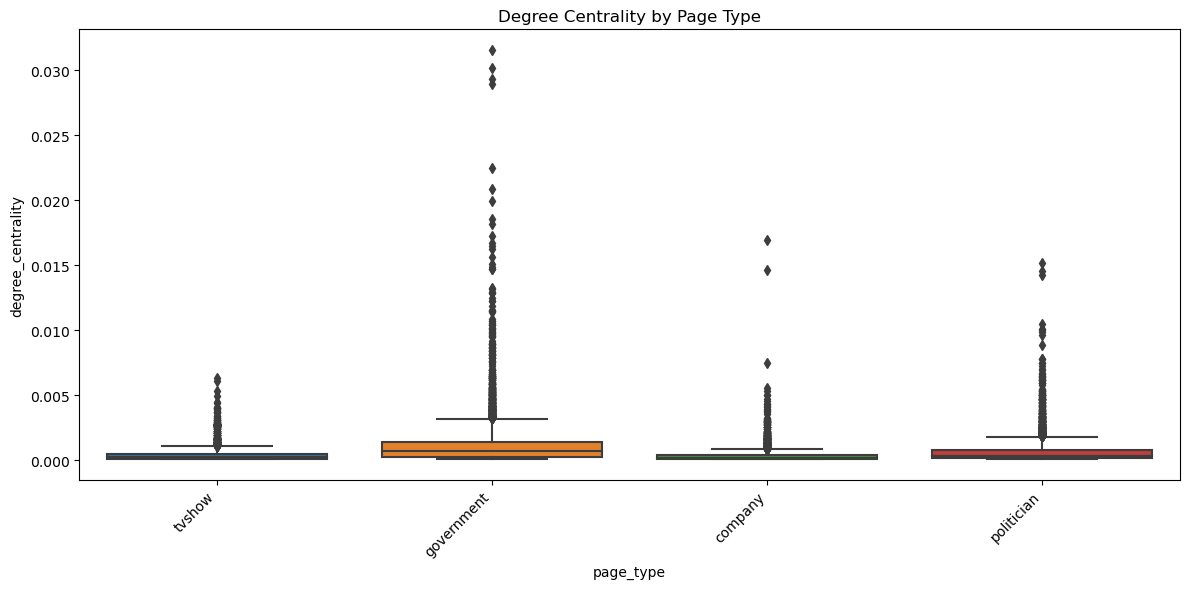

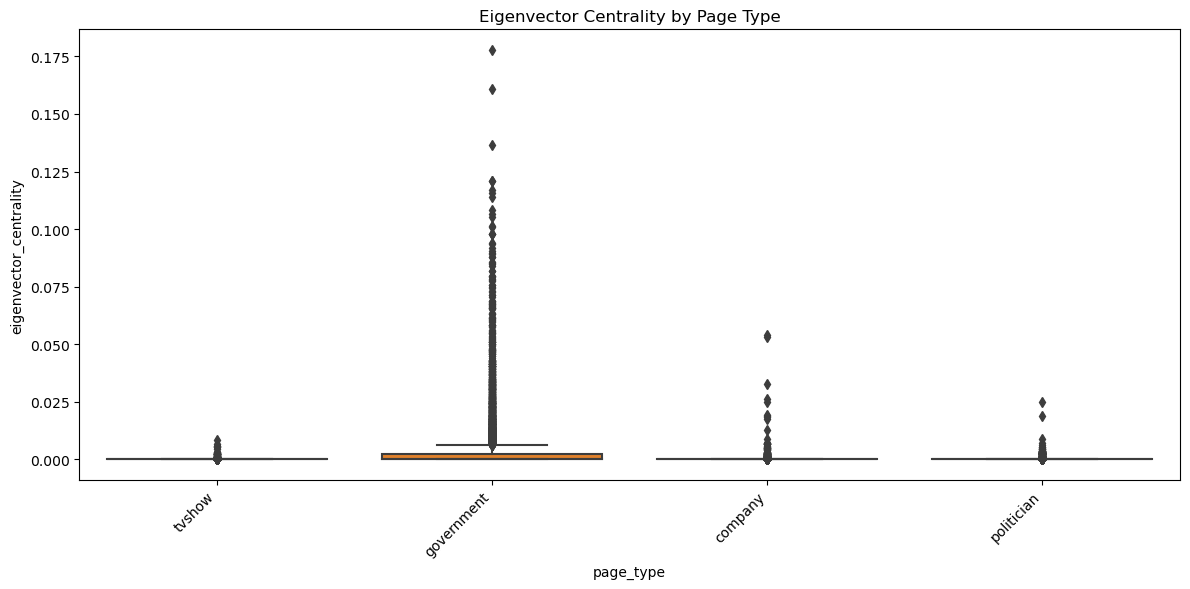


ANOVA results:
Degree Centrality: F_onewayResult(statistic=672.6006861543144, pvalue=0.0)
Eigenvector Centrality: F_onewayResult(statistic=632.6024718879918, pvalue=0.0)

Kruskal-Wallis results:
Degree Centrality: KruskalResult(statistic=2924.3581260748188, pvalue=0.0)
Eigenvector Centrality: KruskalResult(statistic=6884.495962058246, pvalue=0.0)


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# 1. Load the data
edges = pd.read_csv(r'C:\Users\hotga\Documents\Data 620\facebook_large\facebook_large/musae_facebook_edges.csv')
nodes = pd.read_csv(r'C:\Users\hotga\Documents\Data 620\facebook_large\facebook_large/musae_facebook_target.csv')

# 2. Build the network
G = nx.from_pandas_edgelist(edges, "id_1", "id_2")

# Add node attributes (page_name, page_type, etc.)
attr_dict = nodes.set_index("id").to_dict(orient="index")
nx.set_node_attributes(G, attr_dict)

# 3. Compute centrality measures
deg_cent = nx.degree_centrality(G)
eig_cent = nx.eigenvector_centrality(G, max_iter=500)

# Create centrality dataframe
centrality_df = pd.DataFrame({
    "degree_centrality": pd.Series(deg_cent),
    "eigenvector_centrality": pd.Series(eig_cent)
}).merge(nodes, left_index=True, right_on="id")

# 4. Compare centrality across categorical groups
grouped = centrality_df.groupby("page_type")[["degree_centrality", 
                                              "eigenvector_centrality"]].mean()
print("Average centralities by page_type:\n", grouped)

# 5. Visualize centrality distributions
plt.figure(figsize=(12,6))
sns.boxplot(data=centrality_df, x="page_type", y="degree_centrality")
plt.xticks(rotation=45, ha="right")
plt.title("Degree Centrality by Page Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=centrality_df, x="page_type", y="eigenvector_centrality")
plt.xticks(rotation=45, ha="right")
plt.title("Eigenvector Centrality by Page Type")
plt.tight_layout()
plt.show()

# 6. Statistical testing
#    - ANOVA: tests if means differ across groups (parametric)
#    - Kruskal-Wallis: non-parametric test for differences
anova_deg = f_oneway(*(centrality_df.loc[centrality_df["page_type"] == g, 
                                         "degree_centrality"] 
                       for g in centrality_df["page_type"].unique()))
anova_eig = f_oneway(*(centrality_df.loc[centrality_df["page_type"] == g, 
                                         "eigenvector_centrality"] 
                       for g in centrality_df["page_type"].unique()))

print("\nANOVA results:")
print("Degree Centrality:", anova_deg)
print("Eigenvector Centrality:", anova_eig)

kruskal_deg = kruskal(*(centrality_df.loc[centrality_df["page_type"] == g, 
                                          "degree_centrality"] 
                        for g in centrality_df["page_type"].unique()))
kruskal_eig = kruskal(*(centrality_df.loc[centrality_df["page_type"] == g, 
                                          "eigenvector_centrality"] 
                        for g in centrality_df["page_type"].unique()))

print("\nKruskal-Wallis results:")
print("Degree Centrality:", kruskal_deg)
print("Eigenvector Centrality:", kruskal_eig)
